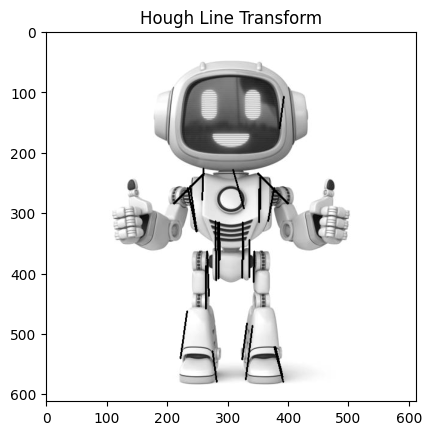

Gambar diubah menjadi grayscale kemudian dilakukan deteksi tepi dengan Canny
Hough Transform digunakan untuk mendeteksi garis dalam gambar


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('robot.jpg', cv2.IMREAD_GRAYSCALE)

# Canny edge detection: Menemukan tepi dalam gambar
edges = cv2.Canny(img, 50, 150, apertureSize=3)

# Hough Line Transform: Mendeteksi garis-garis dalam gambar
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# Visualisasi hasil: Menggambar garis-garis yang terdeteksi
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Menampilkan gambar hasil dengan garis-garis
plt.imshow(img, cmap='gray')
plt.title("Hough Line Transform")
plt.show()

# Menambahkan penjelasan sebagai komentar string
print("Gambar diubah menjadi grayscale kemudian dilakukan deteksi tepi dengan Canny")
print("Hough Transform digunakan untuk mendeteksi garis dalam gambar")


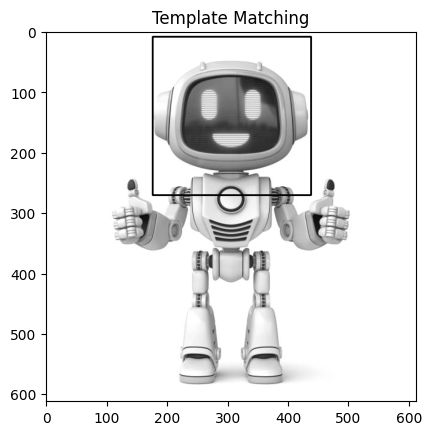

Template matching digunakan untuk mencari objek yang cocok dengan template dalam gambar.
Kotak hijau digambar untuk menunjukkan lokasi objek yang terdeteksi.


In [18]:
# Load template image dan target image
template = cv2.imread('template.jpg', 0)  # Gambar template dalam grayscale
target = cv2.imread('robot.jpg', 0)  # Gambar target dalam grayscale

# Melakukan template matching untuk menemukan kecocokan
result = cv2.matchTemplate(target, template, cv2.TM_CCOEFF_NORMED)

# Menemukan posisi kecocokan terbaik
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Menggambar kotak di sekitar objek yang terdeteksi
h, w = template.shape
cv2.rectangle(target, max_loc, (max_loc[0] + w, max_loc[1] + h), (0, 255, 0), 2)

# Menampilkan gambar hasil deteksi objek
plt.imshow(target, cmap='gray')
plt.title("Template Matching")
plt.show()

# Penjelasan untuk langkah-langkah yang dilakukan
print("Template matching digunakan untuk mencari objek yang cocok dengan template dalam gambar.")
print("Kotak hijau digambar untuk menunjukkan lokasi objek yang terdeteksi.")


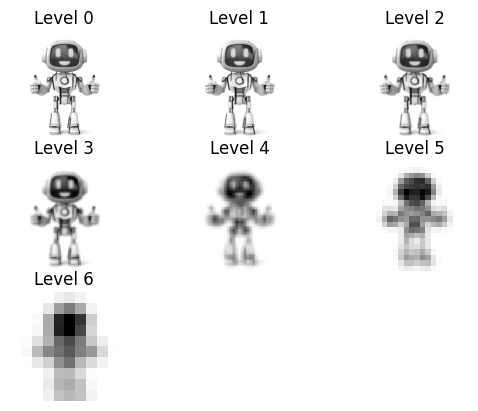

Piramida gambar dibuat dengan mengecilkan gambar secara bertahap pada setiap level.
Setiap level piramida ditampilkan dalam subplot.


In [19]:
# Membuat gambar piramida dengan mengecilkan gambar
img_pyramid = img.copy()
pyramid_images = [img_pyramid]

# Mengurangi ukuran gambar di setiap level piramida
for i in range(6):
    img_pyramid = cv2.pyrDown(img_pyramid)
    pyramid_images.append(img_pyramid)

# Menampilkan gambar-gambar piramida pada setiap level
rows = 3  # Menentukan jumlah baris untuk subplot
cols = 3  # Menentukan jumlah kolom untuk subplot

for i, pyramid in enumerate(pyramid_images):
    plt.subplot(rows, cols, i + 1)  # Menyesuaikan jumlah subplot
    plt.imshow(pyramid, cmap='gray')
    plt.title(f'Level {i}')
    plt.axis('off')  # Menyembunyikan axis
plt.show()

# Penjelasan untuk langkah-langkah yang dilakukan
print("Piramida gambar dibuat dengan mengecilkan gambar secara bertahap pada setiap level.")
print("Setiap level piramida ditampilkan dalam subplot.")


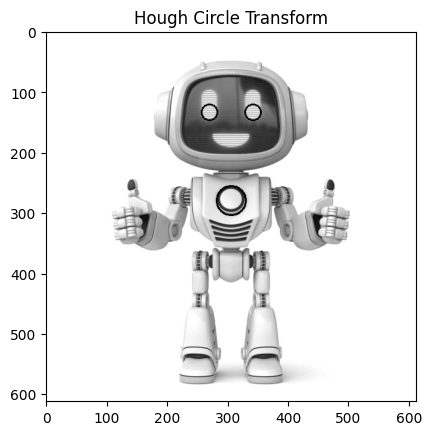

GaussianBlur diterapkan untuk mengurangi noise pada gambar.
Hough Circle Transform digunakan untuk mendeteksi lingkaran dalam gambar.


In [20]:
# Load image dan konversi ke grayscale
img = cv2.imread('robot.jpg', cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur untuk mengurangi noise pada gambar
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Hough Circle Transform: Mendeteksi lingkaran dalam gambar
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=1, maxRadius=30)

# Jika lingkaran terdeteksi, menggambar lingkaran tersebut pada gambar
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

# Menampilkan gambar dengan lingkaran yang terdeteksi
plt.imshow(img, cmap='gray')
plt.title("Hough Circle Transform")
plt.show()

# Penjelasan untuk langkah-langkah yang dilakukan
print("GaussianBlur diterapkan untuk mengurangi noise pada gambar.")
print("Hough Circle Transform digunakan untuk mendeteksi lingkaran dalam gambar.")


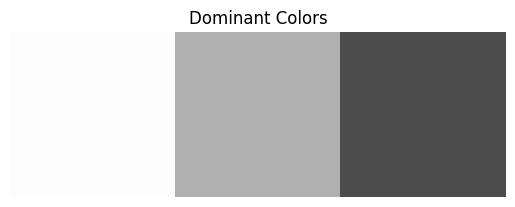

Gambar diubah ke format RGB, kemudian dilakukan clustering menggunakan KMeans untuk menemukan warna dominan.
Warna dominan ditampilkan berdasarkan hasil clustering.


In [21]:
from sklearn.cluster import KMeans

# Mengkonversi gambar ke format RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mengubah gambar menjadi array 2D untuk clustering
pixels = img_rgb.reshape((-1, 3))

# Menggunakan KMeans untuk menemukan warna dominan
kmeans = KMeans(n_clusters=3, random_state=0).fit(pixels)

# Mendapatkan warna dominan (centroid)
dominant_colors = kmeans.cluster_centers_

# Menampilkan warna dominan
plt.imshow([dominant_colors.astype(int)])
plt.axis('off')  # Menyembunyikan axis
plt.title("Dominant Colors")
plt.show()

# Penjelasan untuk langkah-langkah yang dilakukan
print("Gambar diubah ke format RGB, kemudian dilakukan clustering menggunakan KMeans untuk menemukan warna dominan.")
print("Warna dominan ditampilkan berdasarkan hasil clustering.")


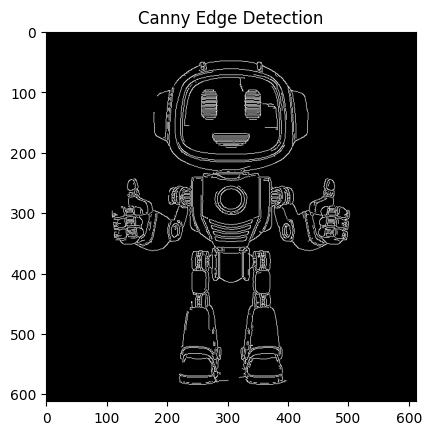

Gambar diubah menjadi grayscale kemudian dilakukan deteksi tepi dengan Canny.


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('robot.jpg')

# Periksa apakah gambar berhasil dimuat
if img is None:
    print("Gambar tidak ditemukan!")
else:
    # Cek apakah gambar sudah grayscale (1 channel)
    if len(img.shape) == 2:
        gray = img  # Gambar sudah grayscale
    else:
        # Konversi gambar ke grayscale jika gambar dalam format BGR
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi dengan Canny
    edges = cv2.Canny(gray, 50, 150)

    # Menampilkan gambar hasil deteksi tepi
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.show()

    # Penjelasan
    print("Gambar diubah menjadi grayscale kemudian dilakukan deteksi tepi dengan Canny.")
